# Guvi Rating Prediction

# Importing Libraries And Loading Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Anjali\\Downloads\\3.1-data-sheet-guvi-courses.csv") 
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [3]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [5]:
# Categorical columns
cat_columns=list(df.select_dtypes(['object']).columns)
print("Categorical Columns")
print(cat_columns)

Categorical Columns
['course_title', 'url', 'level', 'published_timestamp', 'subject']


In [6]:
# Numerical Columns
Num_columns=list(df.select_dtypes(['int','float']))
print('Numerical Columns')
print(Num_columns)

Numerical Columns
['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']


In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


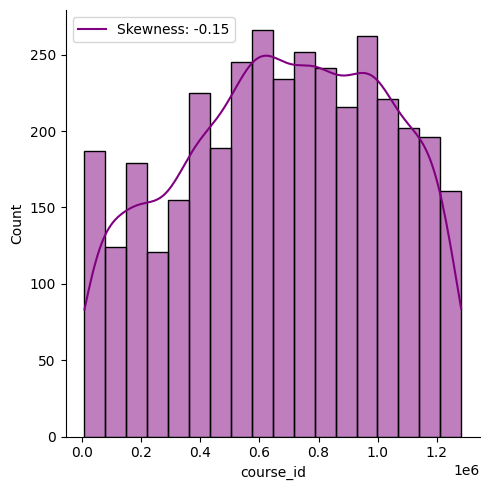

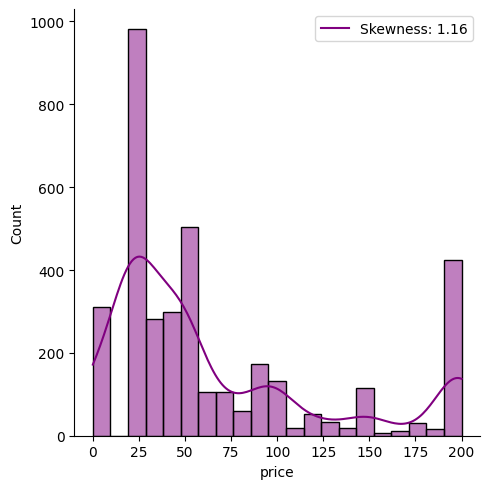

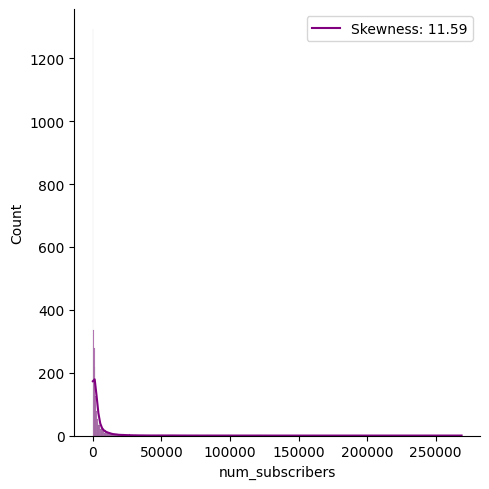

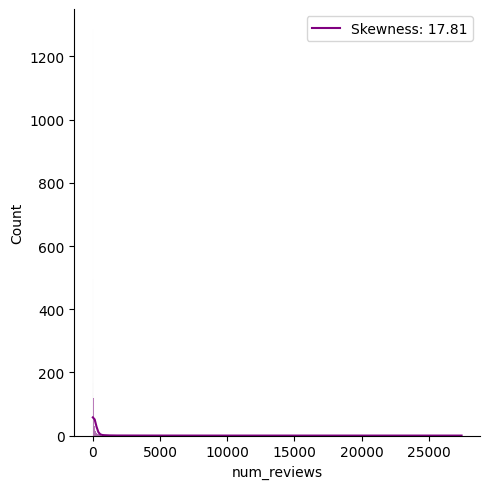

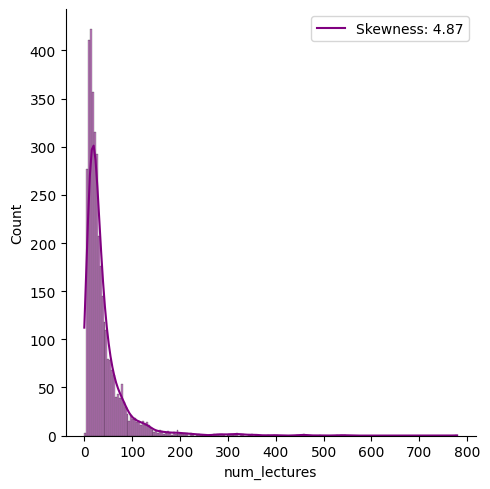

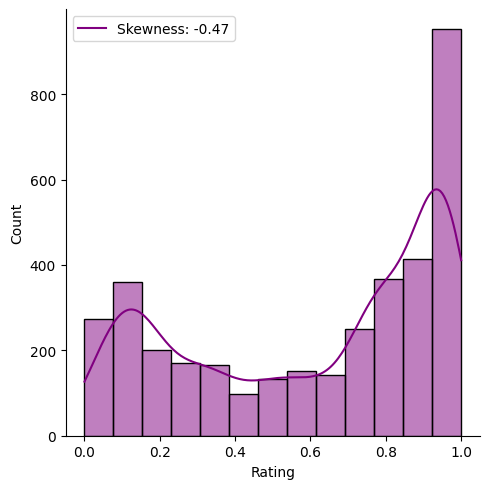

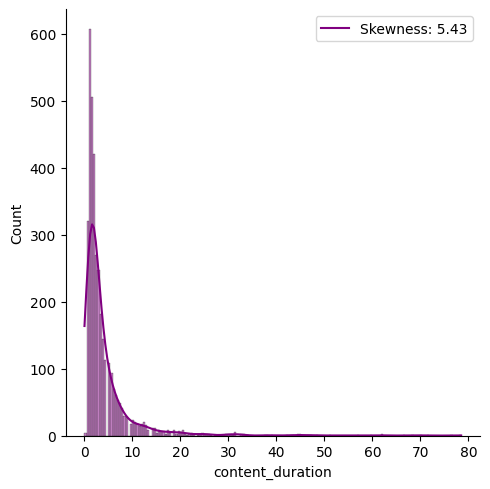

In [8]:
#fig, axes = plt.subplots(4,2,figsize=(25,20))
#i=0
#j=0
for k in range(len(Num_columns)):
  col=Num_columns[k]
  #if j == 1:
    #j=0
   # i=i+1
  #sns.displot(df[col],kde=True,ax=axes[i,j])
  sns.displot(df[col],kde=True, color='purple')
  plt.legend(labels=["Skewness: %.2f"%(df[col].skew())])
 

In [9]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.3+ KB


Out of 3680 rows totaly 4 rows are eliminated; now there are 3676 rows in df after removing null values

# Remove columns which are unwanted

In [13]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [14]:
df.nunique()

course_id              3672
course_title           3663
url                    3672
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
Rating                  101
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [15]:
df['course_id'].value_counts()

course_id
241590.0     2
142666.0     2
1052304.0    2
736940.0     2
286424.0     1
            ..
165964.0     1
192870.0     1
252396.0     1
418732.0     1
1234656.0    1
Name: count, Length: 3672, dtype: int64

In [16]:
df['course_title'].value_counts()

course_title
Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
Improved SEO with Rich Snippets and MicroData                   2
The Complete Web Developer Masterclass: Beginner To Advanced    2
How to Make a Wordpress Website 2017                            2
                                                               ..
Hedge Fund Trading System                                       1
The Complete Bitcoin Course: Get .001 Bitcoin In Your Wallet    1
The Complete Investment Banking Course 2017                     1
Dividend Investing: Build Your Portfolio for a Better Future    1
4 Week Rhythm Mastery                                           1
Name: count, Length: 3663, dtype: int64

In [17]:
df['url'].value_counts()

url
https://www.udemy.com/make-your-own-business-website-beginner-and-intermediate/      2
https://www.udemy.com/improved-seo-with-rich-snippets-and-microdata/                 2
https://www.udemy.com/javascript-course-for-beginners/                               2
https://www.udemy.com/css-website-development-crash-course/                          2
https://www.udemy.com/learn-to-design-a-logo-in-adobe-illustrator/                   1
                                                                                    ..
https://www.udemy.com/stock-trading-ninja-learn-how-to-make-money-trading-stocks/    1
https://www.udemy.com/trading-penny-stocks-a-guide-for-all-levels/                   1
https://www.udemy.com/how-to-make-5000month-trading-penny-stocks/                    1
https://www.udemy.com/hedge-fund-trading-system/                                     1
https://www.udemy.com/4-week-rhythm-mastery/                                         1
Name: count, Length: 3672, dtype: int64

In [18]:
df['published_timestamp'].value_counts()

published_timestamp
2014-06-23T16:03:41Z    2
2014-06-09T10:35:40Z    2
2017-02-07T17:20:39Z    2
2016-02-02T21:05:27Z    2
2014-08-23T23:17:22Z    1
                       ..
2014-02-19T19:04:28Z    1
2014-05-02T15:13:30Z    1
2014-07-01T20:04:27Z    1
2015-03-06T01:11:18Z    1
2017-07-05T16:07:44Z    1
Name: count, Length: 3672, dtype: int64

In [19]:
df['Rating'].value_counts()

Rating
0.96    301
0.94    194
0.11    150
0.88    142
0.76    138
       ... 
0.26      8
0.04      8
0.65      8
0.03      7
0.09      5
Name: count, Length: 101, dtype: int64

If the features 'course_id', 'course_title', 'url', and 'published_timestamp' are not related to the dependent variable 'Ratings' and do not provide any meaningful information for predicting ratings, it is reasonable to drop these features from the dataset.

In [20]:
df.drop(['course_id','course_title','url','published_timestamp'],axis=1,inplace=True)

In [21]:
df

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development
...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments


# Encoding

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3679
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3676 non-null   float64
 1   num_subscribers   3676 non-null   float64
 2   num_reviews       3676 non-null   float64
 3   num_lectures      3676 non-null   float64
 4   level             3676 non-null   object 
 5   Rating            3676 non-null   float64
 6   content_duration  3676 non-null   float64
 7   subject           3676 non-null   object 
dtypes: float64(6), object(2)
memory usage: 258.5+ KB


In [23]:
df['level'].value_counts()

level
All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: count, dtype: int64

In [24]:
cleanup_level = {"level": {"All Levels": 1, "Beginner Level": 2, "Intermediate Level": 3, "Expert Level": 4}}
df['level'] = df['level'].map(cleanup_level['level'])

In [25]:
df['subject'].value_counts()

subject
Subject: Web Development    1203
Business Finance            1191
Musical Instruments          680
Graphic Design               602
Name: count, dtype: int64

In [26]:
subject_num = {'subject': {'Subject: Web Development': 1, 'Business Finance': 2, 'Musical Instruments': 3, 'Graphic Design': 4}}
df['subject'] = df['subject'].map(subject_num['subject'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3679
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3676 non-null   float64
 1   num_subscribers   3676 non-null   float64
 2   num_reviews       3676 non-null   float64
 3   num_lectures      3676 non-null   float64
 4   level             3676 non-null   int64  
 5   Rating            3676 non-null   float64
 6   content_duration  3676 non-null   float64
 7   subject           3676 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 258.5 KB


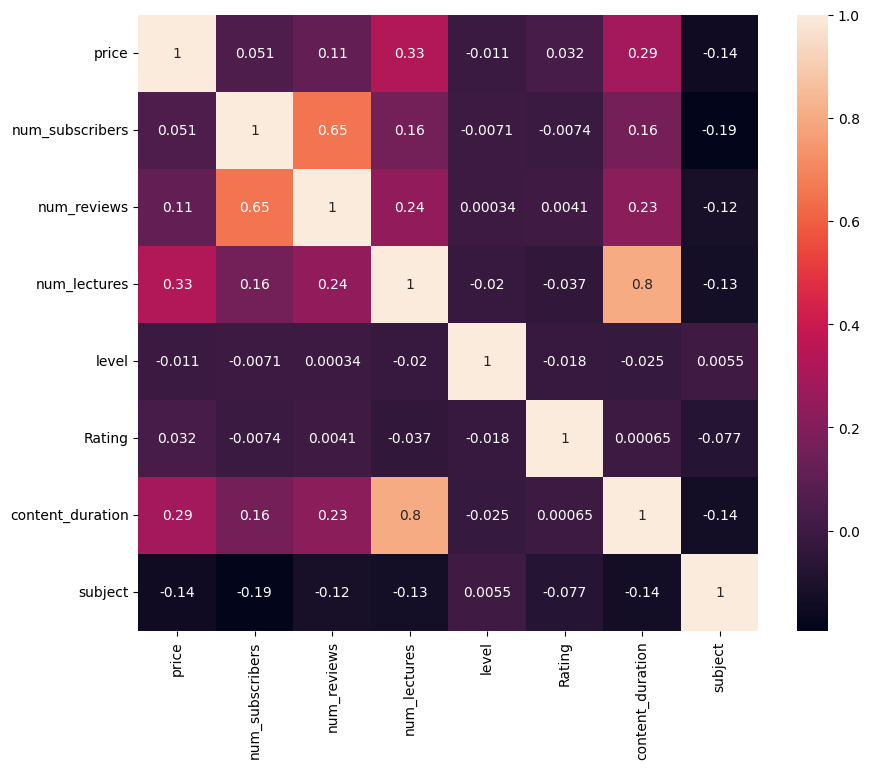

In [28]:
#HEATMAP FOR CORRELATION BETWEEN VARIABLES
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
# Dropping multi collinearity columns 
df.drop(['content_duration','num_reviews'],axis=1,inplace= True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 0 to 3679
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3676 non-null   float64
 1   num_subscribers  3676 non-null   float64
 2   num_lectures     3676 non-null   float64
 3   level            3676 non-null   int64  
 4   Rating           3676 non-null   float64
 5   subject          3676 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 201.0 KB


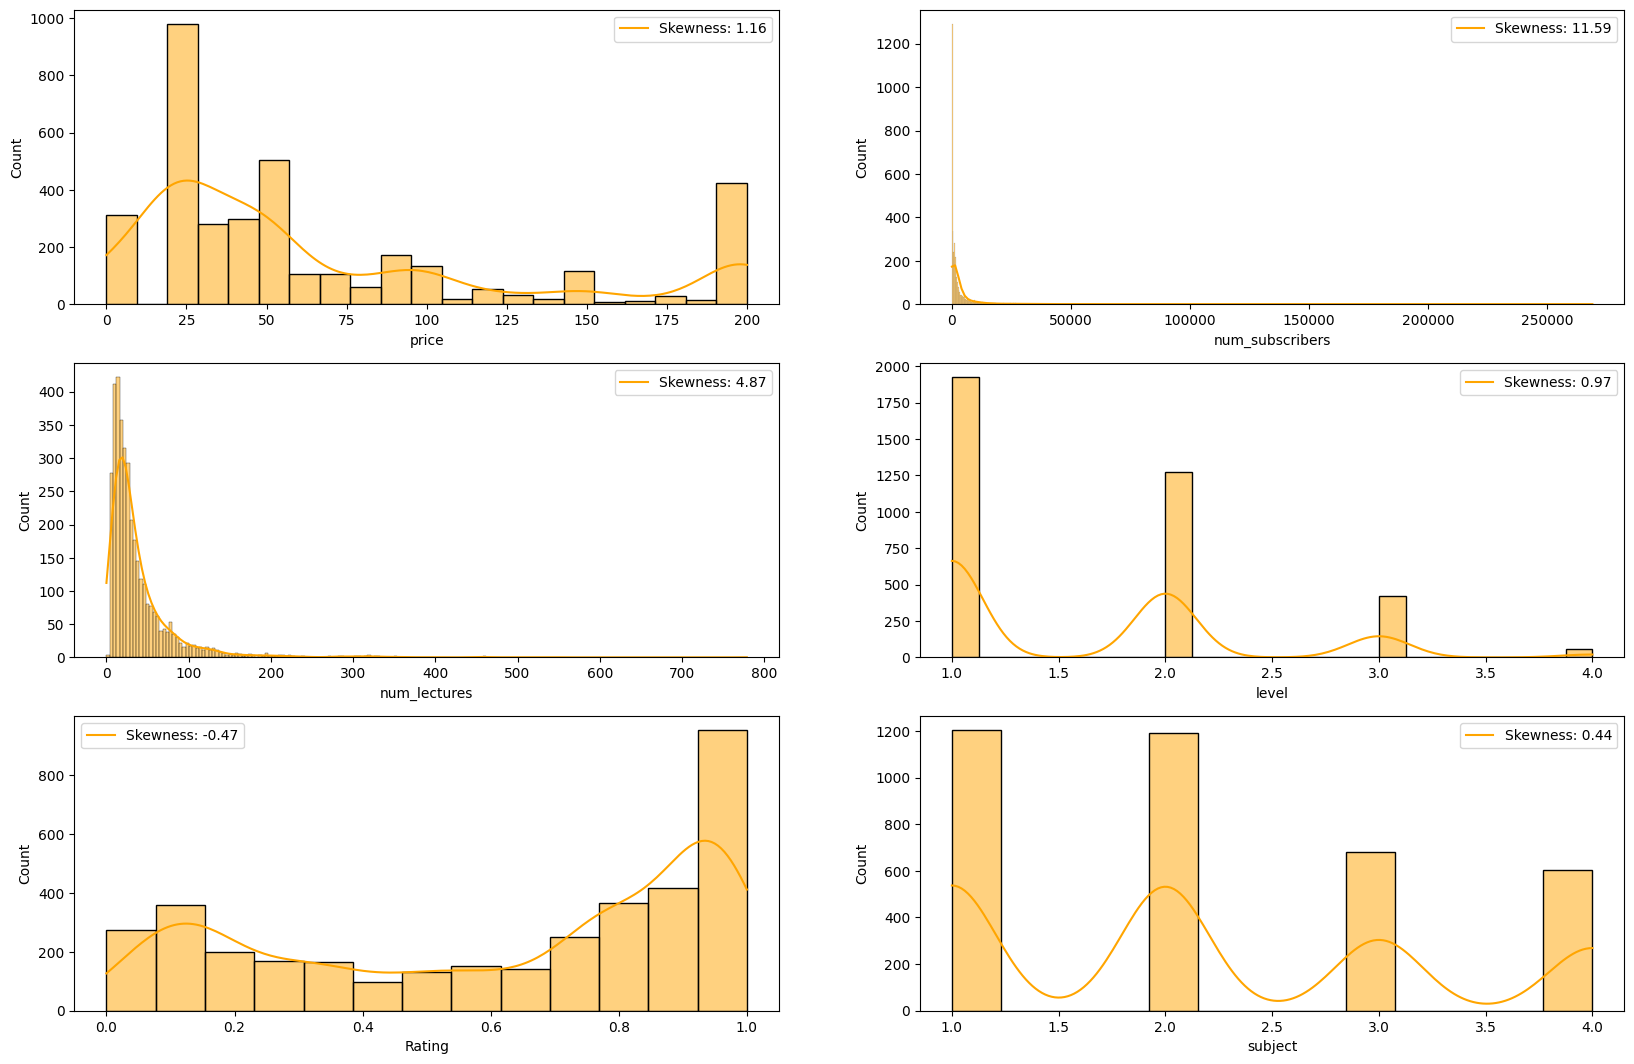

In [31]:
# Handling skewed Data
fig,axes=plt.subplots(3,2,figsize=(20,13))
i=0
j=0
for col in list(df.columns):
  if j==2:
    i=i+1
    j=0
  t=sns.histplot(df[col],ax=axes[i,j],kde=True, color='orange')
  t.legend(labels=["Skewness: %.2f"%(df[col].skew())])
  j=j+1

In [32]:
df.describe()

,price,num_subscribers,num_lectures,level,Rating,subject
count,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,66.115343,3199.260881,40.129761,1.622688,0.610868,2.185256
std,61.056073,9486.582966,50.398507,0.747907,0.334287,1.064561
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,112.000000,15.000000,1.000000,0.280000,1.000000
50%,45.000000,912.500000,25.000000,1.000000,0.760000,2.000000
75%,95.000000,2558.000000,46.000000,2.000000,0.930000,3.000000
max,200.000000,268923.000000,779.000000,4.000000,1.000000,4.000000


price has Only Positive Values
num_subscribers has Only Positive Values
num_lectures has Only Positive Values
level has Only Positive Values
Rating has Only Positive Values
subject has Only Positive Values


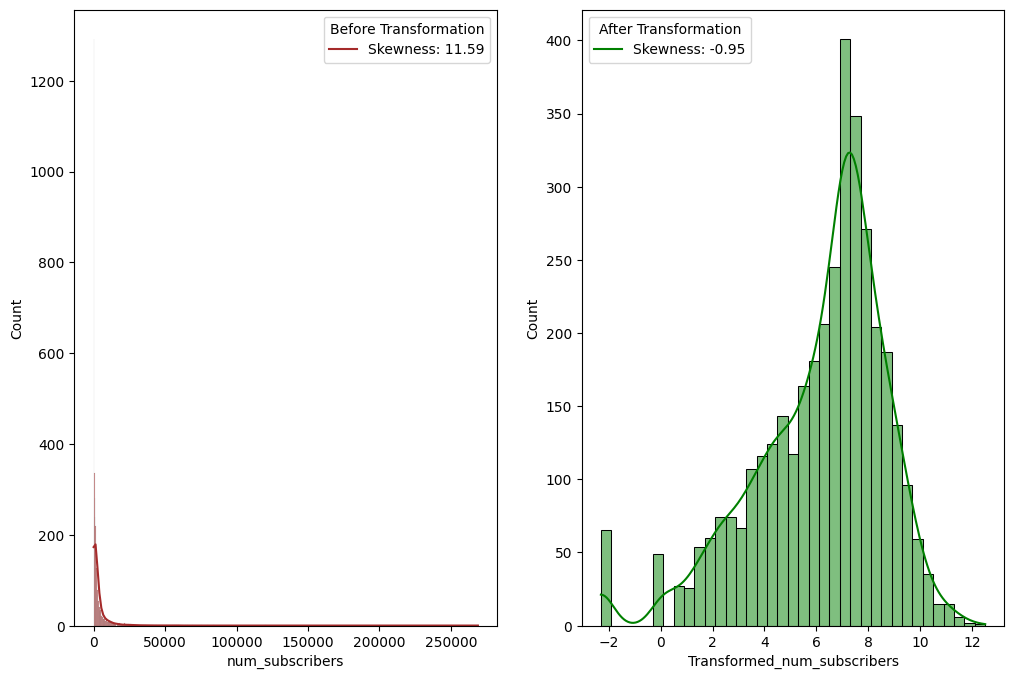

In [33]:
fig,axes=plt.subplots(1,2,figsize=(12,8))
i=0
for col in list(df.columns):
    if  any(x<0 for x in list(df[col]))!=True:
        print(f'{col} has Only Positive Values')
        if df[col].skew() >= 10.0:
            t=sns.histplot(df[col],ax=axes[i],kde=True, color='brown')
            t.legend(labels=["Skewness: %.2f"%(df[col].skew())],title='Before Transformation')

           
            new=f'Transformed_{col}'
            df[new]=df[col].apply(lambda i: np.log(i+0.1))
            t1=sns.histplot(df[new],ax=axes[i+1],kde=True, color='green')
            t1.legend(labels=["Skewness: %.2f"%(df[new].skew())],title='After Transformation')
            i=i+1

In [34]:
df.drop(['num_subscribers'],axis=1,inplace=True)

# Outliers

In [35]:
# As these columns are encoded from categorical to ordinal and 'Rating' is Target variable
new_df=df.drop(['subject','level','Rating'],axis=1)

In [36]:
columns= list(new_df.columns)
columns

['price', 'num_lectures', 'Transformed_num_subscribers']

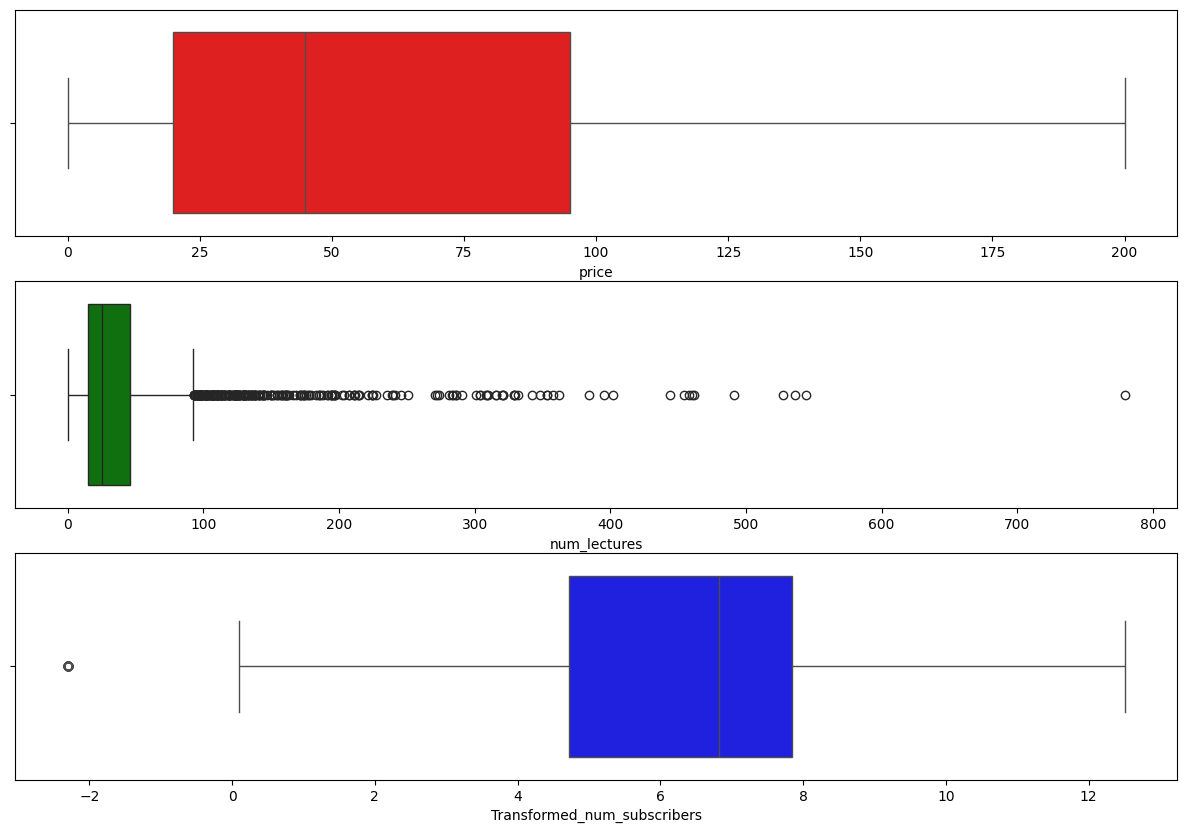

In [37]:
fig, axes = plt.subplots(3, figsize=(15, 10))
colors = ['red', 'green', 'blue']  # Specify the colors for each boxplot
i = 0
for col in columns:
    sns.boxplot(x=col, data=df, orient='h', ax=axes[i], color=colors[i])  # Set the color for each boxplot
    i += 1

<Axes: >

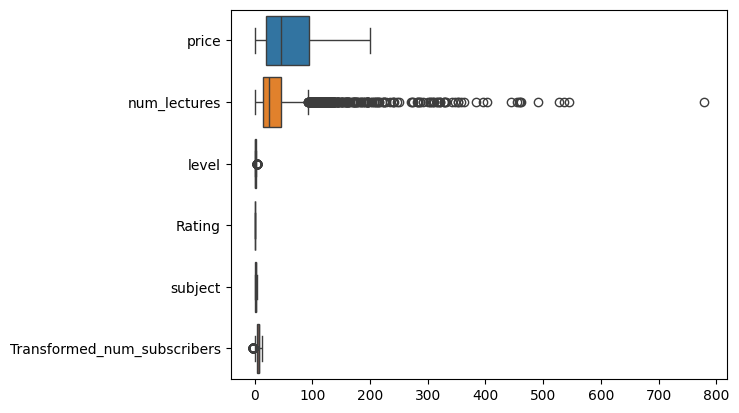

In [38]:
sns.boxplot(df,orient='h')

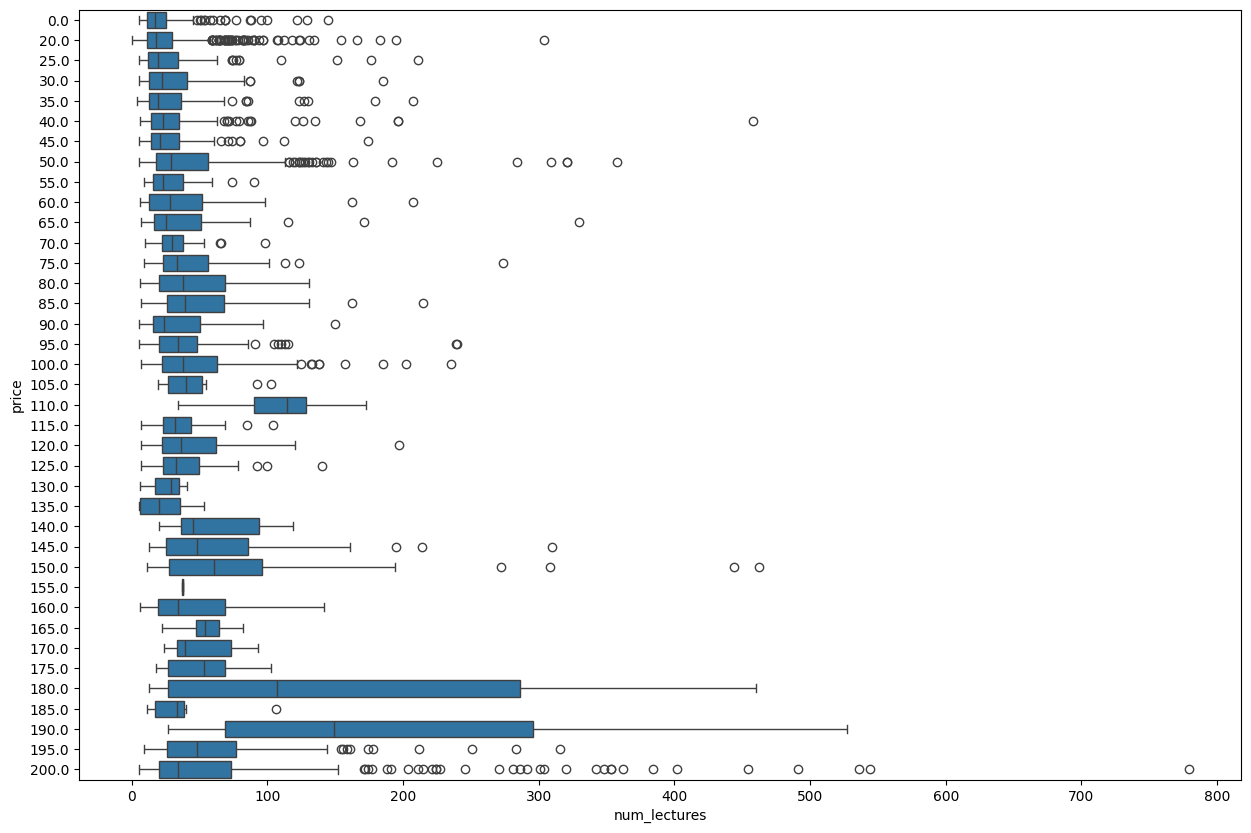

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x='num_lectures',y='price',data=df,orient='h')
plt.show()

In [40]:
outlier_index=[]
for i in columns:
    q1=np.percentile(df[i],25,interpolation="midpoint")
    q3=np.percentile(df[i],75,interpolation="midpoint")
    print("q1 value of {i} is {q1}".format(i=i,q1=q1))
    iqr1=q3-q1
    print("q3 value of {i} is {q2}".format(i=i,q2=q3))
    print("iqr value of {i} is {iqr}".format(i=i,iqr=iqr1))
    lower=df.index[df[i]<(q1-1.5*iqr1)]
    lower_limit=q1-1.5*iqr1
    print(f'Lower limit/bound of {i} is {lower_limit}')
    lowercount=np.size(lower)
    print("Lower Outlier of {column} are {lower} counts".format(column=i,lower=lowercount))
    outlier_index.extend(lower)
    upper=df.index[df[i]>(q3+1.5*iqr1)]
    upper_limit=q3+1.5*iqr1
    print(f'Upper limit/bound of {i} is {upper_limit}')
    uppercount=np.size(upper)
    print("Upper Outlier of {column} are {upper} counts".format(column=i,upper=uppercount))
    outlier_index.extend(upper)
    totalcount=lowercount+uppercount
    print("Total Outliers of {column} is {x}".format(column=i,x=totalcount))

q1 value of price is 20.0
q3 value of price is 95.0
iqr value of price is 75.0
Lower limit/bound of price is -92.5
Lower Outlier of price are 0 counts
Upper limit/bound of price is 207.5
Upper Outlier of price are 0 counts
Total Outliers of price is 0
q1 value of num_lectures is 15.0
q3 value of num_lectures is 46.0
iqr value of num_lectures is 31.0
Lower limit/bound of num_lectures is -31.5
Lower Outlier of num_lectures are 0 counts
Upper limit/bound of num_lectures is 92.5
Upper Outlier of num_lectures are 291 counts
Total Outliers of num_lectures is 291
q1 value of Transformed_num_subscribers is 4.719391330078114
q3 value of Transformed_num_subscribers is 7.847020074416114
iqr value of Transformed_num_subscribers is 3.1276287443379998
Lower limit/bound of Transformed_num_subscribers is 0.027948213571114877
Lower Outlier of Transformed_num_subscribers are 65 counts
Upper limit/bound of Transformed_num_subscribers is 12.538463190923114
Upper Outlier of Transformed_num_subscribers are 

In [41]:
outlier_index.sort()
outlier_index1=sorted(set(outlier_index),key=outlier_index.index)  
print("Total outliers of all columns are",len(outlier_index))
print("Total unique outliers of all columns are",len(outlier_index1))

Total outliers of all columns are 356
Total unique outliers of all columns are 356


In [42]:
# Dropping outliers
df=df.drop(outlier_index1)

In [43]:
df

,price,num_lectures,level,Rating,subject,Transformed_num_subscribers
0,0.0,45.0,2,0.82,1,12.502181
1,0.0,27.0,4,0.69,1,11.989340
3,0.0,30.0,1,0.78,1,11.697670
5,0.0,20.0,1,0.82,1,11.501532
6,30.0,10.0,1,0.79,1,11.349195
...,...,...,...,...,...,...
3664,60.0,11.0,1,0.37,3,0.095310
3665,135.0,5.0,1,0.04,3,0.095310
3666,55.0,37.0,2,0.66,3,0.095310
3667,200.0,22.0,2,0.15,3,0.095310


<Axes: >

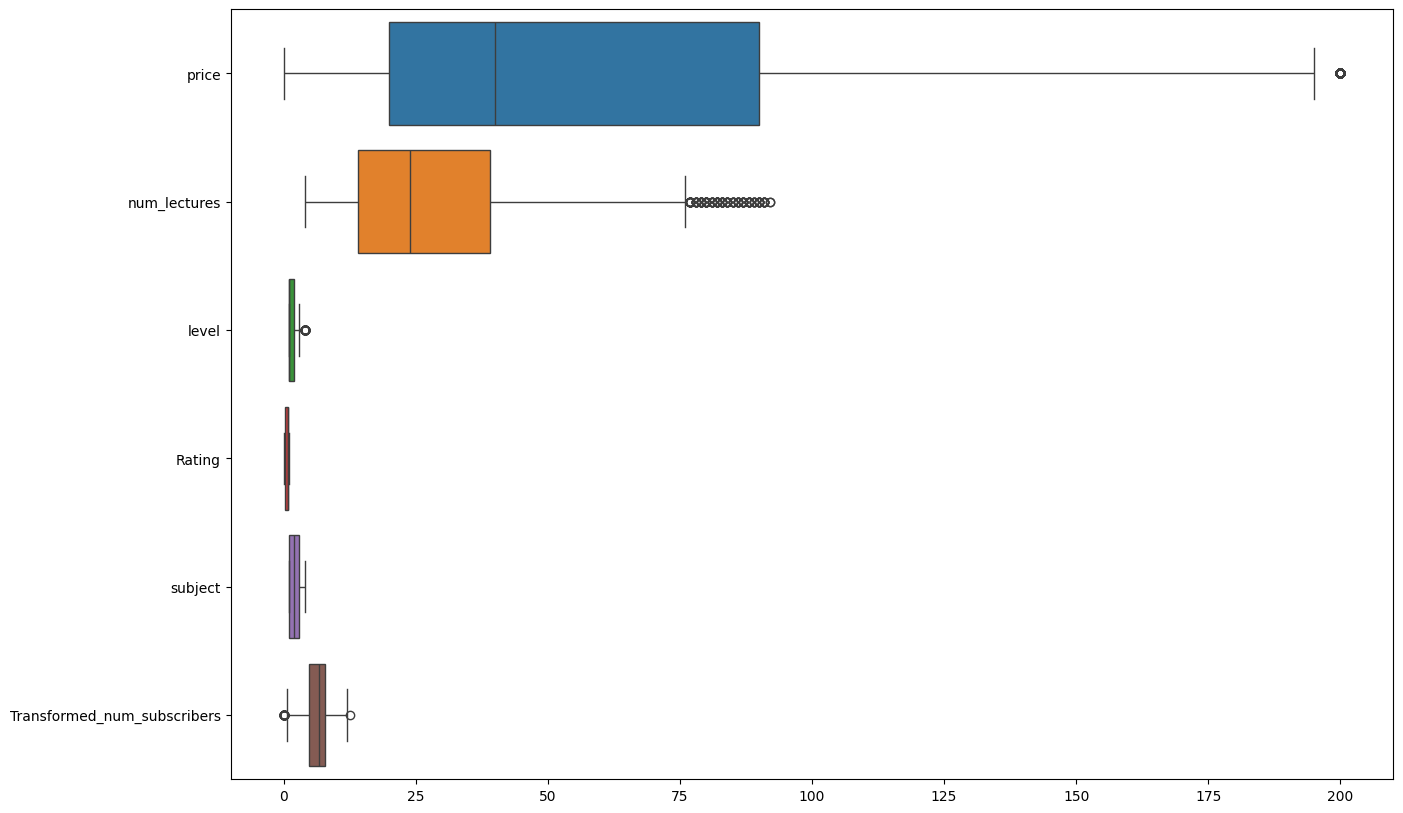

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(df,orient='h')

# Scaling Data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3320 entries, 0 to 3668
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3320 non-null   float64
 1   num_lectures                 3320 non-null   float64
 2   level                        3320 non-null   int64  
 3   Rating                       3320 non-null   float64
 4   subject                      3320 non-null   int64  
 5   Transformed_num_subscribers  3320 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 181.6 KB


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for col in df.columns:
    df[col]=scaler.fit_transform(df[[col]])

In [47]:
df

,price,num_lectures,level,Rating,subject,Transformed_num_subscribers
0,0.000,0.465909,0.333333,0.82,0.000000,1.000000
1,0.000,0.261364,1.000000,0.69,0.000000,0.958665
3,0.000,0.295455,0.000000,0.78,0.000000,0.935156
5,0.000,0.181818,0.000000,0.82,0.000000,0.919347
6,0.150,0.068182,0.000000,0.79,0.000000,0.907069
...,...,...,...,...,...,...
3664,0.300,0.079545,0.000000,0.37,0.666667,0.000000
3665,0.675,0.011364,0.000000,0.04,0.666667,0.000000
3666,0.275,0.375000,0.333333,0.66,0.666667,0.000000
3667,1.000,0.204545,0.333333,0.15,0.666667,0.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3320 entries, 0 to 3668
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3320 non-null   float64
 1   num_lectures                 3320 non-null   float64
 2   level                        3320 non-null   float64
 3   Rating                       3320 non-null   float64
 4   subject                      3320 non-null   float64
 5   Transformed_num_subscribers  3320 non-null   float64
dtypes: float64(6)
memory usage: 181.6 KB


<Axes: >

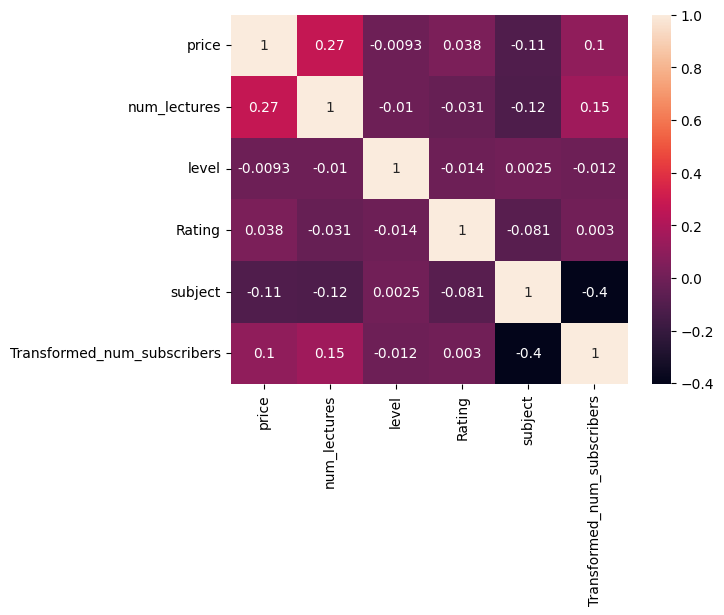

In [49]:
sns.heatmap(df.corr(),annot=True)

# Model Building and Training 

# Splitting Datasets as Training and Testing Datasets

In [50]:
from sklearn.model_selection import train_test_split
y=df['Rating']
x=df.drop(['Rating'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))

The r2 score of Training dataset for linear model is 0.012886628877684991


In [52]:
# Testing Test
r2 = model.score(x_test,y_test)
print('The r2 score of Testing Dataset for a linear model is', r2)

The r2 score of Testing Dataset for a linear model is 0.002966787423716255


# Polynomial Regression Model

In [53]:
#Fitting the polynomial Regression into data set
from sklearn.preprocessing import PolynomialFeatures

# Transform independent variables to polynomial features
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [54]:
# Train the model
model = LinearRegression()
model.fit(x_train_poly, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train_poly, y_train))

The r2 score of Training dataset for linear model is 0.22393517621083636


In [55]:
# Testing Test
r2 = model.score(x_test_poly,y_test)
print('The r2 score of Testing Dataset for a linear model is', r2)

The r2 score of Testing Dataset for a linear model is 0.20765596824971255


# Finding Optimal Depth of Tree

In [56]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
train_accuracy=[]
test_accuracy=[]
  
for i in range(1,25):
    # create a regressor object
    model3 = DecisionTreeRegressor(random_state = 1,max_depth=i) 
    
    # fit the regressor with X and Y data
    model3.fit(x_train, y_train)
    train_accuracy.append(model3.score(x_train,y_train))
    print("The r2 score of Training dataset for linear model is:",model3.score(x_train,y_train))
    
    # Testing Test
    test_accuracy.append(model3.score(x_test,y_test))
    print('The r2 score of Testing Dataset for a linear model is:', r2)

The r2 score of Training dataset for linear model is: 0.05363064461180089
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.20832660750212606
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.238079790067385
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.2843392884565572
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.3389996094105301
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.39852452958581097
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.4553939262568104
The r2 score of Testing Dataset for a

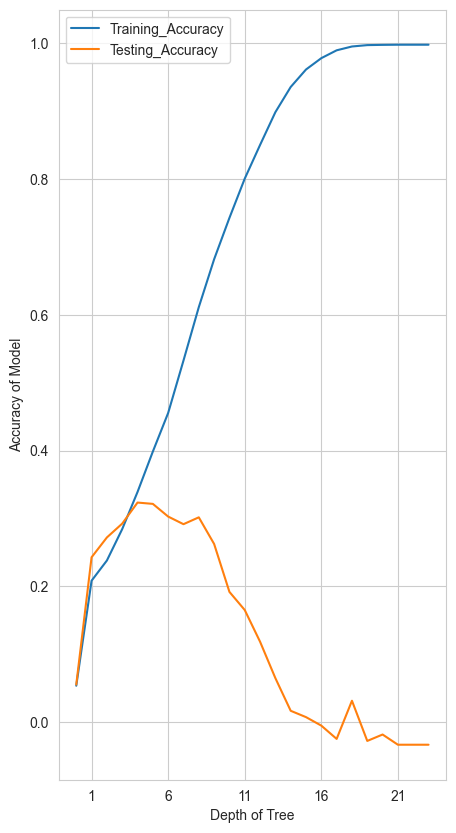

In [57]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(1,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

Decision Tree model gives max 35% accuracy while testing. So It is better to look for other algorithms

# Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = RandomForestRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    print("The r2 score of Training dataset for linear model is:",model.score(x_train,y_train))
    
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    print('The r2 score of Testing Dataset for a linear model is:', r2)

The r2 score of Training dataset for linear model is: 0.05461330271160769
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.20978388288106065
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.24980584715979692
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.30268164463399805
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.3618128112617647
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.4206906227537365
The r2 score of Testing Dataset for a linear model is: 0.20765596824971255
The r2 score of Training dataset for linear model is: 0.4827199083398034
The r2 score of Testing Dataset for

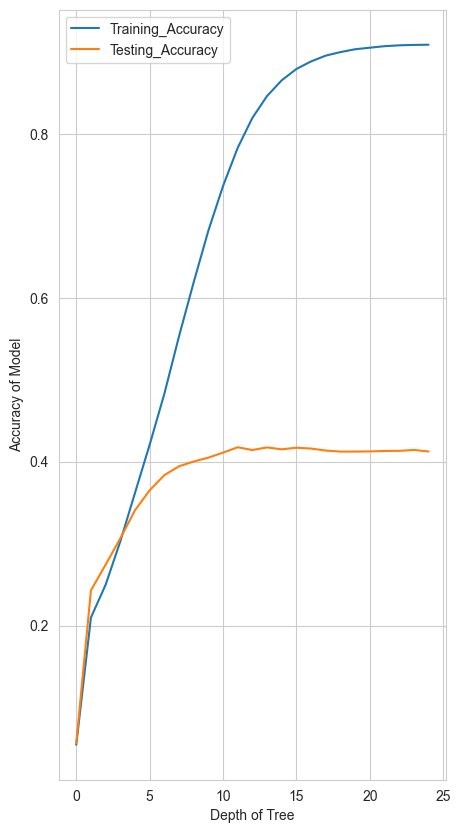

In [59]:
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(0,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

# Building Random Forest Model with optimum Depth

1.Grid Search CV

In [60]:
rfc=RandomForestRegressor(random_state=42)

In [61]:
param_grid = { 
    'n_estimators': [200,300,400, 500,1000],
    'max_features': ['sqrt', 'log2'], # Auto is default value
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15]
}

In [62]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500, 1000]})

In [63]:
CV_rfc.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 400}

In [64]:
results=pd.DataFrame(CV_rfc.cv_results_)

In [65]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.691077,0.003103,0.018234,0.000928,4,sqrt,200,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.193457,0.227399,0.215939,0.206024,0.151361,0.198836,0.026240,119
1,1.027761,0.004447,0.026083,0.000493,4,sqrt,300,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.195855,0.230925,0.214305,0.209105,0.153932,0.200824,0.026000,113
2,1.423380,0.036692,0.033024,0.001180,4,sqrt,400,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.197737,0.229628,0.214776,0.210181,0.154401,0.201345,0.025593,111
3,1.968670,0.251512,0.055652,0.027233,4,sqrt,500,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.195571,0.228758,0.213762,0.208472,0.154460,0.200205,0.025225,115
4,3.923915,0.325791,0.083473,0.003043,4,sqrt,1000,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.196485,0.226258,0.212578,0.207807,0.152871,0.199200,0.025056,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3.840247,0.250665,0.064305,0.014763,15,log2,200,"{'max_depth': 15, 'max_features': 'log2', 'n_e...",0.277342,0.276632,0.294352,0.281011,0.232461,0.272360,0.020945,67
116,6.133492,1.059509,0.090687,0.028226,15,log2,300,"{'max_depth': 15, 'max_features': 'log2', 'n_e...",0.281171,0.279404,0.296714,0.284189,0.234495,0.275195,0.021231,57
117,6.318009,0.302850,0.085827,0.004484,15,log2,400,"{'max_depth': 15, 'max_features': 'log2', 'n_e...",0.283683,0.281560,0.295222,0.284048,0.234452,0.275793,0.021214,53
118,7.530992,0.761758,0.115232,0.018865,15,log2,500,"{'max_depth': 15, 'max_features': 'log2', 'n_e...",0.283172,0.279220,0.295407,0.286600,0.232908,0.275461,0.021937,55


In [66]:
CV_rfc.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500, 1000]})>

In [67]:
CV_rfc.best_score_

0.28398103826675014

In [68]:
print("The r2 score of Training dataset for linear model is",CV_rfc.score(x_train,y_train))
# Testing Test
print('The r2 score of Testing Dataset for a linear model is', CV_rfc.score(x_test,y_test))

y_pred=CV_rfc.predict(x_test)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))

The r2 score of Training dataset for linear model is 0.7217371058600668
The r2 score of Testing Dataset for a linear model is 0.3227607079075133
The RMSE score of model is  0.2697620226801949


# 2.RandomizedSearchCV

In [69]:
from sklearn.model_selection import RandomizedSearchCV
CV_rfc1= RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv= 5)
CV_rfc1.fit(x_train, y_train)

results1=pd.DataFrame(CV_rfc1.cv_results_)

In [70]:
results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.815865,0.283648,0.169841,0.165386,400,log2,7,"{'n_estimators': 400, 'max_features': 'log2', ...",0.263613,0.284447,0.275091,0.264954,0.199583,0.257538,0.029943,7
1,2.658397,0.383669,0.069582,0.047080,500,sqrt,5,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.227528,0.256480,0.242004,0.233162,0.173347,0.226504,0.028319,9
2,4.051419,0.232852,0.086431,0.041374,400,sqrt,10,"{'n_estimators': 400, 'max_features': 'sqrt', ...",0.287308,0.295205,0.300024,0.288162,0.226294,0.279399,0.026962,3
3,7.254263,0.989269,0.195297,0.077857,1000,sqrt,7,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.263779,0.285420,0.275047,0.264007,0.201599,0.257970,0.029302,6
4,9.606526,0.292840,0.142637,0.004606,1000,sqrt,9,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.283094,0.294321,0.292037,0.282296,0.220799,0.274509,0.027272,5
5,15.552469,1.773672,0.245619,0.056090,1000,log2,14,"{'n_estimators': 1000, 'max_features': 'log2',...",0.292422,0.285706,0.295872,0.292181,0.234187,0.280074,0.023177,2
6,6.922632,1.756664,0.133592,0.024454,1000,log2,5,"{'n_estimators': 1000, 'max_features': 'log2',...",0.225687,0.255318,0.240693,0.232108,0.173138,0.225389,0.027948,10
7,1.250532,0.435192,0.039347,0.020049,200,log2,6,"{'n_estimators': 200, 'max_features': 'log2', ...",0.241294,0.272721,0.256083,0.251795,0.190479,0.242474,0.027899,8
8,3.909956,0.452107,0.054344,0.001515,300,log2,12,"{'n_estimators': 300, 'max_features': 'log2', ...",0.293682,0.297654,0.301570,0.289713,0.236565,0.283837,0.023964,1
9,5.179645,1.278614,0.252071,0.201256,400,log2,9,"{'n_estimators': 400, 'max_features': 'log2', ...",0.282596,0.293293,0.293430,0.281123,0.224596,0.275008,0.025730,4


In [71]:
print("The r2 score of Training dataset for linear model is",CV_rfc1.score(x_train,y_train))
# Testing Test
print('The r2 score of Testing Dataset for a linear model is', CV_rfc1.score(x_test,y_test))

y_pred=CV_rfc1.predict(x_test)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))

The r2 score of Training dataset for linear model is 0.7220343472179518
The r2 score of Testing Dataset for a linear model is 0.3230694015070813
The RMSE score of model is  0.26970053532835486


# 3.Manual Optimum

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

# Train the model
model = RandomForestRegressor(n_estimators=500,max_depth=8, random_state=1)
model.fit(x_train, y_train)

# fit the regressor with X and Y data
model.fit(x_train, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
# Testing Test
print('The r2 score of Testing Dataset for a linear model is', model.score(x_test,y_test))

y_pred=model.predict(x_test)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))

The r2 score of Training dataset for linear model is 0.5563365706492349
The r2 score of Testing Dataset for a linear model is 0.39560306307677773
The RMSE score of model is  0.2548419168712313


# GradientBoost Regressor:


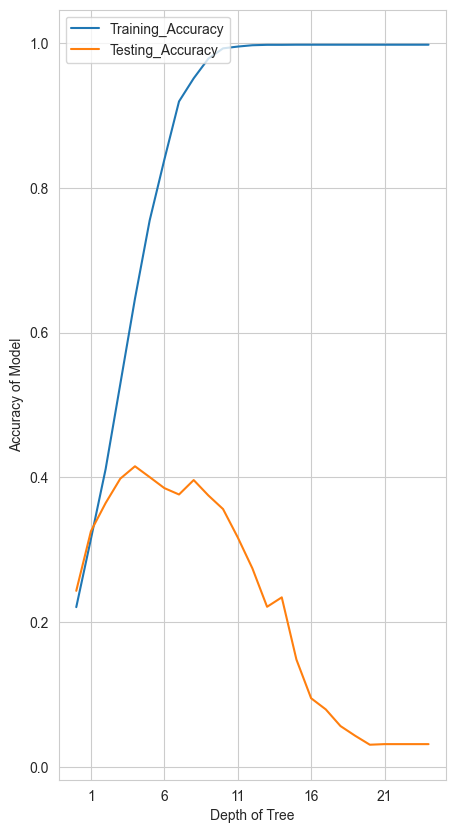

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = GradientBoostingRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)
    
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(1,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

# Building GradientBoosting Model with Optimal Depth


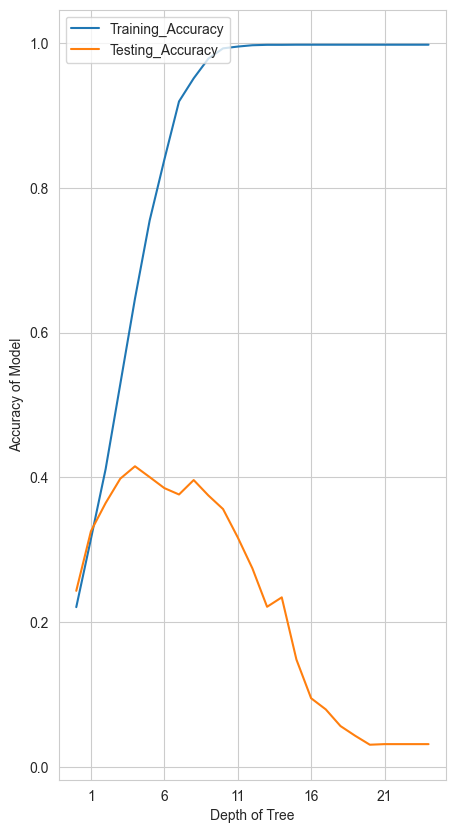

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = GradientBoostingRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)
    
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(1,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

# XG Boosting Model

In [76]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 459.5 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


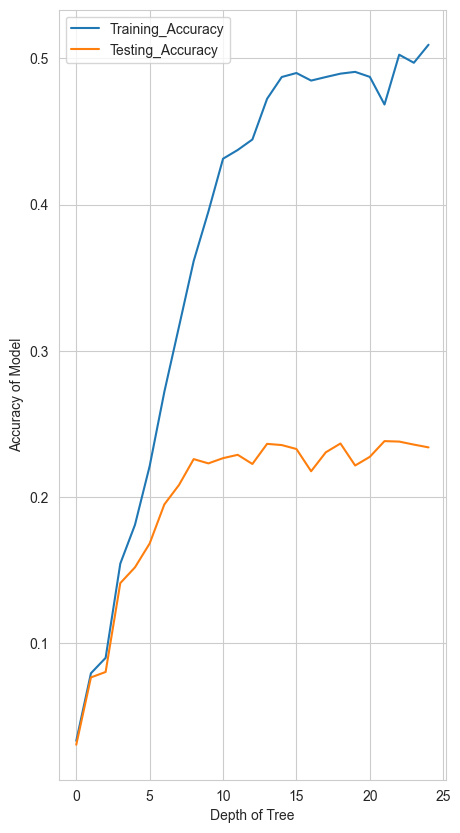

In [77]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=i)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)
    
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(0,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

In [78]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Train the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=15)
model.fit(x_train, y_train)

# fit the regressor with X and Y data
model.fit(x_train, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
# Testing Test
r2 = model.score(x_test,y_test)
print('The r2 score of Testing Dataset for a linear model is', r2)
y_pred=model.predict(x_test)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))

The r2 score of Training dataset for linear model is 0.4872261257724597
The r2 score of Testing Dataset for a linear model is 0.23555844025393324
The RMSE score of model is  0.28660375805974947


# Result

From Trial and testing different models, Random Forest model gives comparatively somewhat better accuracy i.e 40%. So Finally Random Forest Regressor model is selected even though there is lot of scope to work on this project.